# KMeans

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

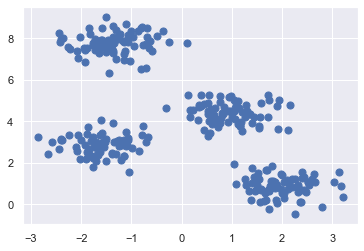

In [22]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, verbose=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Initialization complete
Iteration 0, inertia 258.7840833557937
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 179.1920860046163
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 227.42860654047942
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 245.93130119275497
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 238.76245836430343
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 179.71652995533174
Iteration 1, inertia 147.22638625752415
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 302.6619829363486
Iteration 1, inertia 148.03756532325082

In [7]:
y_kmeans

array([3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 3, 2, 2, 3, 3,
       0, 2, 2, 0, 3, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 0,
       1, 1, 0, 3, 1, 2, 2, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0,
       2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 1, 3, 0, 2, 1,
       3, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3, 3, 0,
       1, 3, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 0, 2, 2, 2, 3, 3, 1, 0, 0, 2, 3,
       1, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 3, 3, 0, 1, 2], d

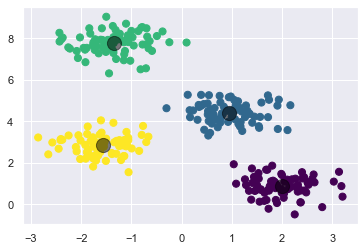

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [9]:
# Initialize yourself

In [63]:
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

In [38]:
pairwise_distances_argmin(np.array([[1,100]]), X)

array([62])

In [ ]:
np.array_equal()

In [64]:
np.min(pairwise_distances(X, X), axis=1)

array([[0.        , 6.05769508, 3.03827243, ..., 2.61776503, 5.94340392,
        2.91337337],
       [6.05769508, 0.        , 3.55327975, ..., 3.54488667, 1.51957258,
        4.71674758],
       [3.03827243, 3.55327975, 0.        , ..., 0.75953276, 3.01151267,
        3.61187579],
       ...,
       [2.61776503, 3.54488667, 0.75953276, ..., 0.        , 3.32897562,
        2.85245997],
       [5.94340392, 1.51957258, 3.01151267, ..., 3.32897562, 0.        ,
        5.34982164],
       [2.91337337, 4.71674758, 3.61187579, ..., 2.85245997, 5.34982164,
        0.        ]])

In [140]:
class KMeans:
    def __init__(self, k, method='k-means++', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(len(X), self.k, replace=False)]
        if self.method == 'k-means++':
            centroids = [X[np.random.choice(len(X))]]
            while len(centroids)<self.k:
                distances = pairwise_distances(X, centroids).min(axis=1)
                new_i = np.random.choice(len(X), p=(distances**2).reshape(-1)/sum(distances**2))
                centroids.append(X[new_i])
            print(centroids)
            return np.array(centroids)
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            # if np.array_equal(new_centroids, self.centroids)
            if (new_centroids == self.centroids).all():
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        return pairwise_distances_argmin(X, centroids)

    def maximization(self, X, clusters):
        return np.array([X[clusters==i].mean(axis=0) for i in range(self.k)])
        
    def predict(self, X):
        return self.expectation(X, self.centroids)
    
    def predict_proba(self, X):
        # ideas ?
        return 

In [141]:
kmeans = KMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

[array([-0.81695777,  6.50765047]), array([-1.66077078,  2.3538766 ]), array([2.04675731, 1.08723953]), array([-1.6127781 ,  7.93373872])]


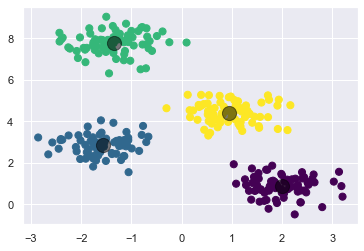

In [138]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
a = np.array([[1], [2]])
# b = np.array([2,3,4])
a = np.append(a,None)
a[-1] = [2,3,4]